In [2]:
%pip install sympy numpy matplotlib
# Importamos `sympy` para que nos ayude a realizar todas las operaciones 
# algebraicas
import sympy, numpy, matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


2.3) a) Escriba La formula de interpolaciôn de Lagrange ajustada a los puntos \
$i = 2, 3,$ y $4$ dados en La siguiente tabla:

\begin{vmatrix*}
    i & x_i  & f(x_i) \\
    \hdashline
    1 & 0    & 0.9126 \\
    2 & 0.25 & 0.8109 \\
    3 & 0.5  & 0.6931 \\
    4 & 0.75 & 0.5596 \\
    5 & 1.0  & 0.4055
\end{vmatrix*}

b) Si La tercera derivada de La funciOn en $i = 3$ es $f" = - 0.26$, estime el \
error de La interpolaciOn de Lagrange obtenido en el inciso a) en $x = 0.6$.




a) Escriba La formula de interpolaciôn de Lagrange ajustada a los puntos \
$i = 2, 3,$ y $4$ dados en la tabla.

In [3]:
x, x2, x3, x4, f2, f3, f4 = sympy.symbols('x 0.25 0.5 0.75 0.8109 0.6931 0.5596')

f = (((x - x3) * (x - x4))/((x2 - x3) * (x2 - x4)) * (f2)) + \
    (((x - x2) * (x - x4))/((x3 - x2) * (x3 - x4)) * (f3)) + \
        (((x - x2) * (x - x3))/((x4 - x2) * (x4 - x3)) * (f4))
sympy.Eq(sympy.symbols('g(x)'), f)

Eq(g(x), 0.5596*(-0.25 + x)*(-0.5 + x)/((-0.25 + 0.75)*(-0.5 + 0.75)) + 0.6931*(-0.25 + x)*(-0.75 + x)/((-0.25 + 0.5)*(0.5 - 0.75)) + 0.8109*(-0.5 + x)*(-0.75 + x)/((0.25 - 0.5)*(0.25 - 0.75)))

Dejando que sympy resuelva la ecuación, nos queda:

In [4]:
x = sympy.symbols('x')

f = ((x - 0.5) * (x - 0.75))/((0.25 - 0.5) * (0.25 - 0.75)) * (0.8109) + \
    ((x - 0.25) * (x - 0.75))/((0.5 - 0.25) * (0.5 - 0.75)) * (0.6931) + \
        ((x - 0.25) * (x - 0.5))/((0.75 - 0.25) * (0.75 - 0.5)) * (0.5596)
sympy.Eq(sympy.symbols('g(x)'), f)

Eq(g(x), 6.4872*(x - 0.75)*(x - 0.5) - 11.0896*(x - 0.75)*(x - 0.25) + 4.4768*(x - 0.5)*(x - 0.25))

b) Si La tercera derivada de La función en $i = 3$ es $f''' = - 0.26$, estime el \
error de la interpolación de Lagrange obtenido en el inciso a) en $x = 0.6$.


In [5]:
e = ((x - x2) * (x - x3) * (x - x4)) / (sympy.symbols('3!')) * (sympy.symbols("f'''(3)"))
sympy.Eq(sympy.symbols('e(x)'), e)

Eq(e(x), f'''(3)*(-0.25 + x)*(-0.5 + x)*(-0.75 + x)/3!)

In [6]:
e = ((x - 0.25) * (x - 0.5) * (x - 0.75)) / (sympy.factorial(3)) * (-0.26)
sympy.Eq(sympy.symbols('e(x)'), e)

Eq(e(x), -0.0433333333333333*(x - 0.75)*(x - 0.5)*(x - 0.25))

Reemplazando $x = 0.6$ resulta en:

In [7]:
sympy.Eq(sympy.symbols('e(x)'), e).subs(x, 0.6)

Eq(e(x), 0.0002275)

Dejando que sympy resuelva la ecuación

2.11) Si se ajusta un polinomio de interpolaciOn de Lagrange a cuatro datos \
en x = 1, 2, 3 y 4, aparecen los siguientes polinomios ciibicos en Ia formula \
de interpolación:

a) $\frac{(x-2)(x-3)(x-4)}{(1-2)(1-3)(1-4)}$

b) $\frac{(x-1)(x-3)(x-4)}{(2-1)(2-3)(2-4)}$

c) $\frac{(x-1)(x-2)(x-4)}{(3-1)(3-2)(3-4)}$

d) $\frac{(x-1)(x-2)(x-3)}{(4-1)(4-2)(4-3)}$

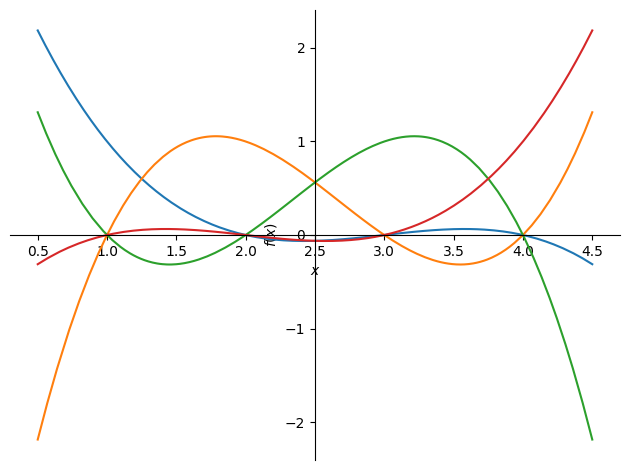

In [8]:
x = sympy.symbols('x')
f1 = ((x - 2) * (x - 3) * (x - 4))/((1 - 2) * (1 - 3) * (1 - 4))
f2 = ((x - 1) * (x - 3) * (x - 4))/((2 - 3) * (2 - 1) * (2 - 4))
f3 = ((x - 1) * (x - 2) * (x - 4))/((3 - 1) * (3 - 2) * (3 - 4))
f4 = ((x - 1) * (x - 2) * (x - 3))/((4 - 1) * (4 - 2) * (4 - 3))

sympy.plot(f1, f2, f3, f4, (x, 0.5, 4.5))

2.16) Deduzca el polinomio de interpolaciOn de Newton hacia adelante que pasa \
por los puntos $i = 2, 3, 4$ dados en Ia siguiente tabla:

\begin{vmatrix*}
    i & x_i  & f(x_i) \\
    \hdashline
    1 & 0    & 0.9126 \\
    2 & 0.25 & 0.8109 \\
    3 & 0.5  & 0.6931 \\
    4 & 0.75 & 0.5596 \\
    5 & 1.0  & 0.4055
\end{vmatrix*}


Creamos la fila en la tabla correspondiente de diferencias hacia delante para los $i$ dados:

In [24]:
f2, f3, f4 = 0.8109, 0.6931, 0.5596
df2 = f3 - f2
df3 = f4 - f3
ddf2 = (f4 - f3) - (f3 - f2)

s, x, h, x2 = sympy.symbols('s x h x2')
sf2 = sympy.symbols(str(f2))
sdf2 = sympy.symbols(str(df2))
sddf2 = sympy.symbols(str(ddf2))
s = (x - x2) / h

y = sf2 - sdf2*s - (sddf2*s)/sympy.factorial(2)*s*(s-1)
sympy.Eq(sympy.symbols('y'), y)

Eq(y, --0.01570000000000016*(-1 + (x - x2)/h)*(x - x2)**2/(2*h**2) - -0.1177999999999999*(x - x2)/h + 0.8109)

Dejamos que sympy resuelva la ecuación

In [25]:
y = f2 - df2*s - (ddf2*s)/sympy.factorial(2)*s*(s-1)
sympy.Eq(sympy.symbols('y'), y)

Eq(y, 0.8109 + 0.1178*(x - x2)/h + 0.00785000000000008*(-1 + (x - x2)/h)*(x - x2)**2/h**2)

Reemplazamos el valor de $x2$ y $h = 0.25$, obteniendo:

In [32]:
y = f2 - df2*s - (ddf2*s)/sympy.factorial(2)*s*(s-1)
sympy.Eq(sympy.symbols('y'), y.subs(x2, 0.25).subs(h, 0.25))

Eq(y, 0.4712*x + 0.125600000000001*(x - 0.25)**2*(4.0*x - 2.0) + 0.6931)

2.18) Haga la tabla de diferencias hacia adelante a partir de la siguiente \
tabla de valores:

\begin{vmatrix*}
    i & x_i  & f(x_i) \\
    \hdashline
    1 & 0.5 & 1.143 \\
    2 & 1.0 & 1.000 \\
    3 & 1.5 &  0.828 \\
    4 & 2.0 &  0.667 \\
    5 & 2.5 &  0.533 \\
    6 & 3.0 &  0.428 \\
\end{vmatrix*}

Por medio de las formulas de Newton hacia adelante, escriba los polinomios de interpolaciOn
ajustados a:

a) $i = 1, 2, 3$ \
b) $i = 4, 5, 6$ \
c) $i = 2, 3, 4, 5$


